# Assignment 1: Basics of Python programming and probability
## Author: Claudio Díaz García

Advanced Statistics  
MSc Bioinformatics for Health Sciences (UPF-UB)

## Generala
We come back to the Generala game used in the Problem 1 of the last class.

### 1. Write a function that lists all the possible outcomes with five dice.

In [9]:
def five_dice():
    """Returns a list with all possible outcomes of rolling five dice"""
    outcomes = [[]]  # Create an empty list which will contain every possible result
    for dice in range(5):  # Iterate as many times as dice (five, in this case)
        prev_dice = outcomes.copy()  # Copy the previous results to keep track in the next loop
        outcomes = []  # Overwrite the initial list to remove the previous results
        for result in prev_dice:  # For each outcome in the previous result
            for points in range(1, 7):
                outcomes.append(result + [points])  # Add a new dice roll result and add it to the list of outcomes
    return outcomes

### 2. Write a function that takes a number of dice and return all the possible outcomes for that amount of dice.
We use the same function as in the previous exercise, but we add a n parameter to indicate the number of dice to roll. This parameter is used in the range() function (line 4) to modify the number of iterations.

In [8]:
def dice_roller(n):
    """Returns a list with all possible outcomes of rolling n dice"""
    outcomes = [[]]
    for dice in range(n):
        prev_dice = outcomes.copy()
        outcomes = []
        for result in prev_dice:
            for points in range(1, 7):
                outcomes.append(result + [points])
    return outcomes

### 3. Write functions that return, given five dice, True or False if we have Straight, Full, Poker or Generala.

First, to make sure that there are five dice results as input, we check the length of the list. If it has not got length 5, an error message is prompted.  
  
In the first case, we make a set from the input, as it can only contain unique values, and compare its length with the length of the input list. If they are the same, it means that the five values are different and we have got straight.

In [29]:
def straight(dice_results):
    """Returns true if the five numbers are different"""
    if len(dice_results) == 5:
        return len(set(dice_results)) == 5
    else:
        return "Please, introduce a list of five numbers as input."

In the second case, we check that the set from the input has got lenght two, which means that there are only two different values in the input list. Then, we check that one of the values is present 2 or 3 times, to test if there is a full. There is not need to check the other value, as the only possibility given the previous code is that, if the first value is the duo, then the second value is the trio, and viceversa.

In [56]:
def full(dice_results):
    """Returns true if there is a set of three combined with a set of two numbers"""
    if len(dice_results) == 5:
        dice_set = set(dice_results)
        return (len(dice_set) == 2) & (dice_results.count(dice_set.pop()) in [2, 3])
    else:
        return "Please, introduce a list of five numbers as input."

In the third case, the approach is similar to the previous function. We check that the set of the input list has got length two and that one of the values is present 1 or 4 times. For the same reason as before, there is not need to check the other value.

In [60]:
def poker(dice_results):
    """Returns true if there is a set of four numbers"""
    if len(dice_results) == 5:
        dice_set = set(dice_results)
        return (len(dice_set) == 2) & (dice_results.count(dice_set.pop()) in [1, 4])
    else:
        return "Please, introduce a list of five numbers as input."

In the last case, we only need to check that all the values are the same. Therefore, we check that we have a set of length 1 so we have a Generala.

In [11]:
def generala(dice_results):
    """Returns true if the five numbers are equal"""
    if len(dice_results) == 5:
        return len(set(dice_results)) == 1
    else:
        return "Please, introduce a list of five numbers as input."

### 4. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands _served_.

To count the probability of each outcome, we have to divide the number of favorable outcomes by the total number of possible outcomes (Laplace's rule). Therefore, we have to count the possible outcomes for each case.  
  
In all cases the total number of possible outcomes is $6^5$, because we have 6 different sides in a dice and we are playing with 5 dice. As each dice is independent, we multiply the number of outcomes for every dice. Anyway, we can obtain this number applying the function `length()` to the output of the `five_dice()` function created in the exercise 1.  
  
To calculate the number of favorable outcomes, we use the conditions applied in the previous exercise in a comprehension list statement, for better performance.  

In [44]:
def prob_served_straight():
    all_outcomes = five_dice()
    fav_outcomes = [outcome for outcome in all_outcomes if len(set(outcome)) == 5]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Straight with a served hand is %.5f." %(prob_served_straight()))

The probability of getting a Straight with a served hand is 0.09259.


In [10]:
def prob_served_full():
    all_outcomes = five_dice()
    fav_outcomes = [outcome for outcome in all_outcomes if ((len(set(outcome)) == 2) &
                    (outcome.count(set(outcome).pop()) in [2, 3]))]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Full with a served hand is %.5f." %(prob_served_full()))

The probability of getting a Full with a served hand is 0.03858.


In [7]:
def prob_served_poker():
    all_outcomes = five_dice()
    fav_outcomes = [outcome for outcome in all_outcomes if ((len(set(outcome)) == 2) &
                    (outcome.count(set(outcome).pop()) in [1, 4]))]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Poker with a served hand is %.5f." %(prob_served_poker()))

The probability of getting a Poker with a served hand is 0.01929.


In [47]:
def prob_served_generala():
    all_outcomes = five_dice()
    fav_outcomes = [outcome for outcome in all_outcomes if len(set(outcome)) == 1]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Generala with a served hand is %.5f." %(prob_served_generala()))

The probability of getting a Generala with a served hand is 0.00077.


### 5. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.

In this exercise, we need to take into account that we can roll the dice up to three times. To calculate the probabilities, we can use the fact that the probability of an event plus the probability of the opposite event sums up to 1. Therefore, we will compute the probability of having the desired outcome for each of the rolls and then substract the three of them to 1. We will address the different number of possible outcomes after each roll using the `dice_roller()` function from exercise 2.   

In [103]:
def prob_straight():
    all_outcomes1 = dice_roller(5)
    fav_outcomes1 = [outcome for outcome in all_outcomes if len(set(outcome)) == 5]
    prob1 = fav_outcomes1 / len(all_outcomes1)
    all_outcomes2_1 = dice_roller(1)
    
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Straight after three rolls is %.5f." %(prob_straight()))

NameError: name 'all_outcomes' is not defined

**NOTE:** This is the furthest I could get trying to do this exercise on my own. I will ask for help in the next tutorial time.  

### 6. Write a function that simulates a roll with n fair dice.

In [14]:
from random import randint
def roll(n):
    """Returns a list with the results of a roll with n dice"""
    return [randint(1, 6) for dice in range(n)]

### 7. Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dice of the same kind and rolling the others) that returns True if we get a Generala and a False otherwise. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

A priori, we already know that this kind of function will follow a Bernouilli distribution. As we are only looking at the result of the game, we can say that our probability function will return 1 if we get a Generala and 0 if not. As we play again, it will become evident that we have a distribution with mean equal to the probability of success. We can prove this having a look at the results when repeating the game 10000 times.  

In [79]:
def generala_game():
    """Returns True if a Generala was obtained or False otherwise"""
    roll1 = roll(5)  # First roll
    if len(set(roll1)) == 1:  # If it is a Generala, return True
        return True
    else:  # Second roll
        keep_num = max(set(roll1), key = roll1.count)  # Get the most repeated value in the roll
        keep_dice = roll1.count(keep_num)  # Get the number of dice with that value in the roll
        roll2 = roll(5 - keep_dice) + [keep_num] * keep_dice  # Roll again the non-repeated dice and keep the rest
        if len(set(roll2)) == 1:
            return True
        else:  # Third roll
            keep_num = max(set(roll2), key = roll2.count)
            keep_dice = roll2.count(keep_num)
            roll3 = roll(5 - keep_dice) + [keep_num] * keep_dice
            return len(set(roll3)) == 1

Now, we can get a list with the results, converting the True or False values to 1 and 0, respectively.

In [102]:
list_results = [int(generala_game()) for result in range(10000)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

And we can plot them in a histogram to see the distribution.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

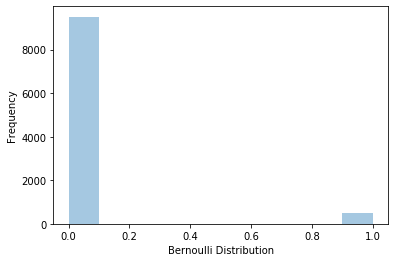

In [98]:
%matplotlib inline
import seaborn as sns

graph = sns.distplot(list_results, bins = 10, kde = False)
graph.set(xlabel = "Bernoulli Distribution", ylabel= "Frequency")

It is obvious that the frequency of 1 is much smaller than the probability of 0. In addition, as we have previously shown that 

### 8. Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

In this case, we can hypothesize that this function will follow an Exponential distribution, as we are seeing how many times we have to play until a certain event happens (in this case, a Generala). We will see it graphically, using the same strategy as in the previous exercise.

In [82]:
def generala_win():
    counter = 1
    while True:
        if generala_game():
            return counter
            break
        else:
            counter += 1

We get the list of results after 10000 times.

In [99]:
list_results = [generala_win() for result in range(10000)]

And we plot the distribution.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

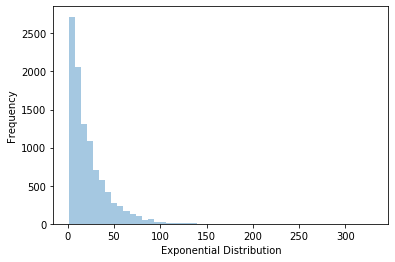

In [101]:
graph = sns.distplot(list_results, kde = False)
graph.set(xlabel = "Exponential Distribution", ylabel= "Frequency")

We can see that the shape of the distribution corresponds to an Exponential.